In [ ]:
import pandas as pd # Librería para estructura de datos
import seaborn as sns # Librería para poder crear gráficos estadísticos
import matplotlib.pyplot as plt # Librería para poder graficar
from sklearn.preprocessing import MinMaxScaler # Librería para el escalado de datos
from sklearn.model_selection import train_test_split # Librería para procesar datos
from tensorflow.keras.models import Sequential # Librería para el modelo neuronal
from tensorflow.keras.layers import Dense # Librería para el modelo neuronal
from sklearn.metrics import mean_absolute_error # Librería para calcular el error absoluto

In [ ]:
df = pd.read_csv("house_price.csv") # df representa DataFrame
df # para ver el DataFrame


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.info() # Puedo visualizar el tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe().transpose() # Describe: calcula un resumen de las estadísticas relacionadas con las columnas DataFrame
                          # Transpose: cambia filas por columnas

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df.isnull().sum() # Verificar si hay datos nulos

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<ipython-input-8-917fc6740196>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.8, # Mapa de calor y df.corr() Correlación de datos


<Axes: title={'center': 'Corr. Pearson'}>

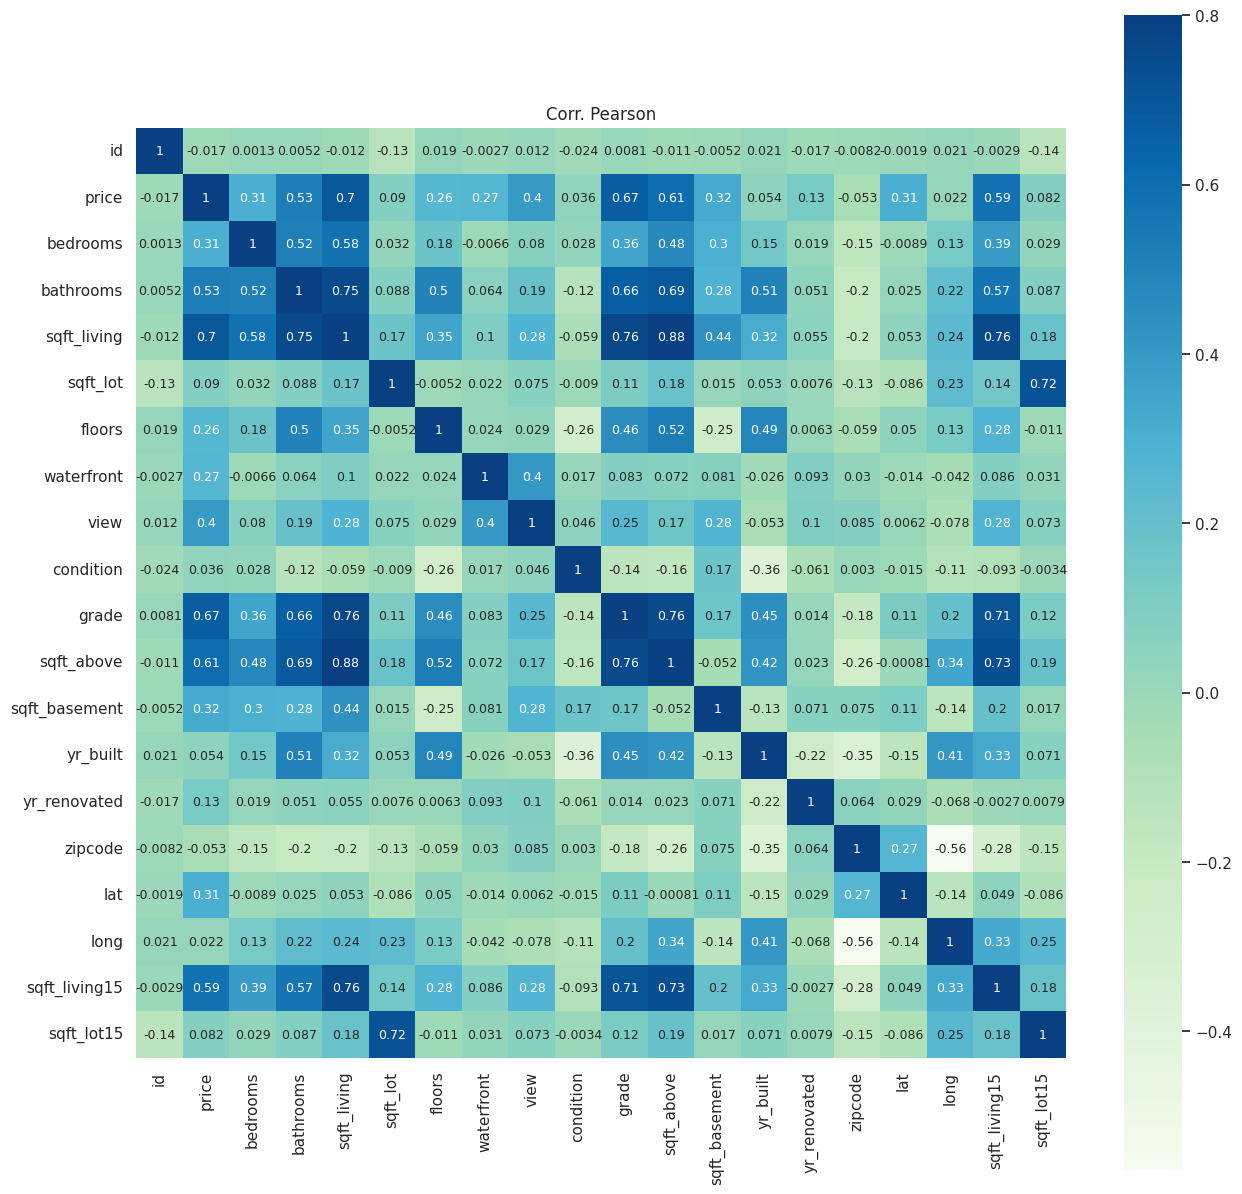

In [ ]:
sns.set(style='whitegrid',font_scale=1) #
plt.figure(figsize=(15,15)) # Tamaño de la figura
plt.title("Corr. Pearson") # Titulo de la figura
sns.heatmap(df.corr(),vmax=0.8, # Mapa de calor y df.corr() Correlación de datos
            square=True,cmap="GnBu",
            linecolor='r', annot=True, # anoot = True cuando tengo pocos datos
            annot_kws={'size':9})

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

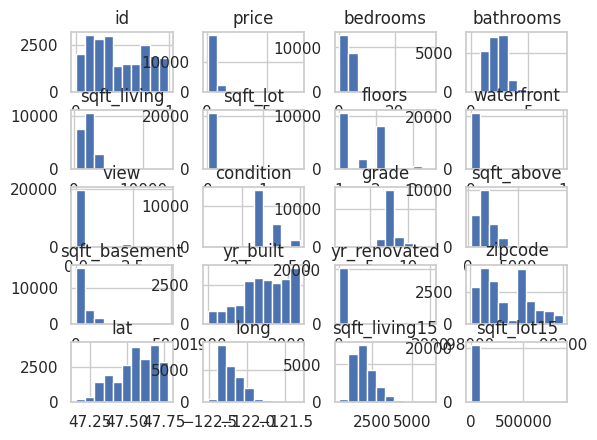

In [ ]:
df.hist() # Grafica la distribución

In [ ]:
# A partir del análsis de los diagramas presentados en la imagen anterior se decide aplicar: Linealidad

# Borrado de variabls basura (en este caso)
df = df.drop('id',axis=1) # Axis = 1 (Columnas), 0 (Filas)
df = df.drop('long',axis=1)
df = df.drop('lat',axis=1)
df = df.drop('zipcode',axis=1)
df = df.drop('sqft_living',axis=1)

In [ ]:
df # Ver la tabla con los elementos que acabamos de borrar

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1131,3.0,0,0,3,8,1530.0,0,2009,0,1530,1509
21609,20150223T000000,400000.0,4,2.50,5813,2.0,0,0,3,8,2310.0,0,2014,0,1830,7200
21610,20140623T000000,402101.0,2,0.75,1350,2.0,0,0,3,7,1020.0,0,2009,0,1020,2007
21611,20150116T000000,400000.0,3,2.50,2388,2.0,0,0,3,8,1600.0,0,2004,0,1410,1287


In [ ]:
df['date'] = pd.to_datetime(df['date']) # Convertir el dato tipo Object a tipo fecha
df['month'] = df['date'].apply(lambda date:date.month) # Extraer el mes
df['year'] = df['date'].apply(lambda date:date.year) # Extraer el año

df = df.drop('date',axis = 1) #Borrar la fecha porque ya no me sirve ese tipo de dato

In [ ]:
df # Veremos los nuevos cambios (Se agregó el mes y la fecha y se eliminó el tipo de dato objeto)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650,10,2014
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639,12,2014
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062,2,2015
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000,12,2014
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,0,3,8,1530.0,0,2009,0,1530,1509,5,2014
21609,400000.0,4,2.50,5813,2.0,0,0,3,8,2310.0,0,2014,0,1830,7200,2,2015
21610,402101.0,2,0.75,1350,2.0,0,0,3,7,1020.0,0,2009,0,1020,2007,6,2014
21611,400000.0,3,2.50,2388,2.0,0,0,3,8,1600.0,0,2004,0,1410,1287,1,2015


In [ ]:
# Limpiar los datos nulos
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  float64
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  month          21613 non-null  int64  
 16  year           21613 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 2.8 MB


In [ ]:
# Ahora todos los datos son numéricos y no tenemos datos nulos
# Sin embargo, aún se trata de distintos tipos de datos (numéricos), con esto se usa Escalado de Datos

# Para hacer un escalado, siempre debemos quitar la etiqueta y, luego solo aplicarlo a las características X
X = df.drop('price', axis=1) # X mayúscula
                             # Crear otro dataFrame X borrando este dato y luego lo tiene Y
y = df['price'] # y minúscula


In [ ]:
X

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,month,year
0,3,1.00,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650,10,2014
1,3,2.25,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639,12,2014
2,2,1.00,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062,2,2015
3,4,3.00,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000,12,2014
4,3,2.00,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1131,3.0,0,0,3,8,1530.0,0,2009,0,1530,1509,5,2014
21609,4,2.50,5813,2.0,0,0,3,8,2310.0,0,2014,0,1830,7200,2,2015
21610,2,0.75,1350,2.0,0,0,3,7,1020.0,0,2009,0,1020,2007,6,2014
21611,3,2.50,2388,2.0,0,0,3,8,1600.0,0,2004,0,1410,1287,1,2015


In [ ]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X)
X = scalerMinMax.transform(X)

In [ ]:
X # Ya vemos los datos de X escalados

array([[9.09090909e-02, 1.25000000e-01, 3.10751079e-03, ...,
        5.74235339e-03, 8.18181818e-01, 0.00000000e+00],
       [9.09090909e-02, 2.81250000e-01, 4.07186891e-03, ...,
        8.02711852e-03, 1.00000000e+00, 0.00000000e+00],
       [6.06060606e-02, 1.25000000e-01, 5.74253455e-03, ...,
        8.51301880e-03, 9.09090909e-02, 1.00000000e+00],
       ...,
       [6.06060606e-02, 9.37500000e-02, 5.02774650e-04, ...,
        1.55763777e-03, 4.54545455e-01, 0.00000000e+00],
       [9.09090909e-02, 3.12500000e-01, 1.13154584e-03, ...,
        7.30573466e-04, 0.00000000e+00, 1.00000000e+00],
       [6.06060606e-02, 9.37500000e-02, 3.36798440e-04, ...,
        8.10982495e-04, 8.18181818e-01, 0.00000000e+00]])

In [ ]:
# Con la base de datos ya limpia, se procede con el Modelo
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=80,test_size=0.3) # Únicamente cuando se trata de un modelo supervisado
                                    # Random_state es la semilla

In [ ]:
X_train

array([[0.09090909, 0.21875   , 0.00614294, ..., 0.01028431, 0.09090909,
        1.        ],
       [0.12121212, 0.3125    , 0.00339221, ..., 0.00628224, 0.81818182,
        0.        ],
       [0.09090909, 0.25      , 0.00405248, ..., 0.00757453, 0.45454545,
        0.        ],
       ...,
       [0.09090909, 0.3125    , 0.00917655, ..., 0.01361095, 0.27272727,
        1.        ],
       [0.12121212, 0.3125    , 0.02092391, ..., 0.01040033, 0.63636364,
        0.        ],
       [0.06060606, 0.125     , 0.0445422 , ..., 0.04928959, 0.63636364,
        0.        ]])

In [ ]:
y_train

1923     315000.0
19988    897000.0
619      210000.0
12876    299000.0
17996    253000.0
           ...   
8714     361000.0
2259     390000.0
19366    660000.0
5308     915000.0
17583    269500.0
Name: price, Length: 15129, dtype: float64

In [ ]:
# Modelo Neuronal
modelANN = Sequential()
modelANN.add(Dense(15,activation='relu')) # Capa de entrada, absorbe los datos
modelANN.add(Dense(10,activation='relu')) # Capa que aprende patrones de las características (Suele ser la mitad, pero siempre menos de lo inicial)
modelANN.add(Dense(5,activation='relu'))  # Lo mismo de la anterior siguiendo ese concepto
modelANN.add(Dense(1))
modelANN.compile(optimizer='adam',loss='mse')


In [ ]:
modelANN.fit(x = X_train, y = y_train, validation_data=(X_test,y_test), batch_size=100, epochs=150, verbose=1) # Entrenar los datos

Epoch 1/150
152/152 [==============================] - 2s 4ms/step - loss: 428742508544.0000 - val_loss: 421143838720.0000
Epoch 2/150
152/152 [==============================] - 0s 3ms/step - loss: 428655804416.0000 - val_loss: 420928487424.0000
Epoch 3/150
152/152 [==============================] - 0s 3ms/step - loss: 428119097344.0000 - val_loss: 419949641728.0000
Epoch 4/150
152/152 [==============================] - 0s 2ms/step - loss: 426419421184.0000 - val_loss: 417398456320.0000
Epoch 5/150
152/152 [==============================] - 0s 3ms/step - loss: 422658113536.0000 - val_loss: 412298018816.0000
Epoch 6/150
152/152 [==============================] - 0s 3ms/step - loss: 415810519040.0000 - val_loss: 403637174272.0000
Epoch 7/150
152/152 [==============================] - 0s 3ms/step - loss: 404907425792.0000 - val_loss: 390545604608.0000
Epoch 8/150
152/152 [==============================] - 0s 3ms/step - loss: 389199855616.0000 - val_loss: 372409860096.0000
Epoch 9/150
152/

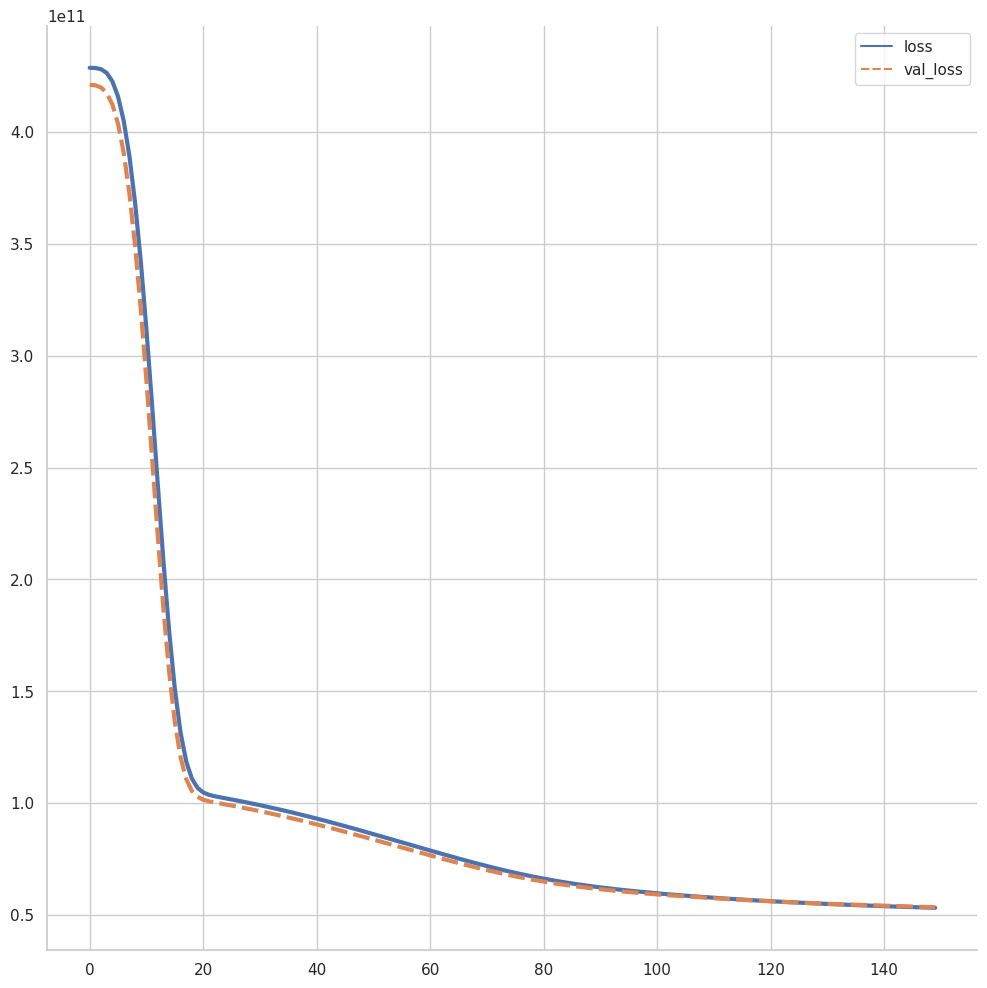

In [ ]:
# Graficar la pérdida
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [ ]:
# Se calcula siempre en modelos de regresión
y_pred_Test = modelANN.predict(X_test)
error_absolute = mean_absolute_error(y_test, y_pred_Test)
print(error_absolute)


203/203 [==============================] - 0s 1ms/step
146287.81689132945


In [ ]:
y_pred_train = modelANN.predict(X_train)
error_absolute_train = mean_absolute_error(y_train, y_pred_train)
print(error_absolute_train)

473/473 [==============================] - 1s 1ms/step
146967.2691359995


In [ ]:
house1 = df.drop('price',axis=1).iloc[0]

In [ ]:
house1

bedrooms            3.0
bathrooms           1.0
sqft_lot         5650.0
floors              1.0
waterfront          0.0
view                0.0
condition           3.0
grade               7.0
sqft_above       1180.0
sqft_basement       0.0
yr_built         1955.0
yr_renovated        0.0
sqft_living15    1340.0
sqft_lot15       5650.0
month              10.0
year             2014.0
Name: 0, dtype: float64

In [ ]:
pricesHouse1 = df.iloc[0]['price']

In [ ]:
pricesHouse1

221900.0

In [ ]:
# Aplicar escaaldo de datos cuandot engo distintos tipos de datos
# Para obtener el precio real de la casa 1 usando escalado usando el scarlerMinMax
house1_escalado = scalerMinMax.transform(house1.values.reshape(-1,16)) #-1,16 filas y columnas

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
house1_escalado

array([[0.09090909, 0.125     , 0.00310751, 0.        , 0.        ,
        0.        , 0.5       , 0.5       , 0.09758772, 0.        ,
        0.47826087, 0.        , 0.16193426, 0.00574235, 0.81818182,
        0.        ]])

In [ ]:
price_predict = modelANN.predict(house1_escalado)[0,0]

1/1 [==============================] - 0s 27ms/step


In [ ]:
#Precio de predicción
price_predict

230875.95

In [ ]:
# Precio real
pricesHouse1

221900.0

In [ ]:
modelANN.save("modelPredictHouse.h5") # Para guardar el modelo